In [ ]:
from google.colab import files
files.upload()

In [ ]:
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!ls ~/.kaggle
!chmod 600 /root/.kaggle/kaggle.json

kaggle.json


In [ ]:
!kaggle datasets download -d shaunthesheep/microsoft-catsvsdogs-dataset

100% 788M/788M [00:20<00:00, 44.9MB/s]
100% 788M/788M [00:20<00:00, 39.6MB/s]


In [ ]:
!unzip -q microsoft-catsvsdogs-dataset.zip -d .

In [ ]:
!rm PetImages/Cat/666.jpg
!rm PetImages/Dog/11702.jpg

In [ ]:
import numpy as np
import pandas as pd
from fastai.vision.all import*
from fastai.metrics import error_rate, accuracy
from fastai.vision.data import ImageDataLoaders
import warnings

warnings.filterwarnings("ignore")

In [ ]:
size = 450
bs = 64

In [ ]:
import os
labels = os.listdir("PetImages")

for label in labels:
  print(label)

Cat
Dog


In [ ]:
batch_tfms = [*aug_transforms(size = 224), Normalize.from_stats(*imagenet_stats)]

In [ ]:
data = ImageDataLoaders.from_folder("PetImages",
                                    valid_pct = 0.2,
                                    ds_tfms = batch_tfms,
                                    item_tfms = Resize(size),
                                    bs = bs)

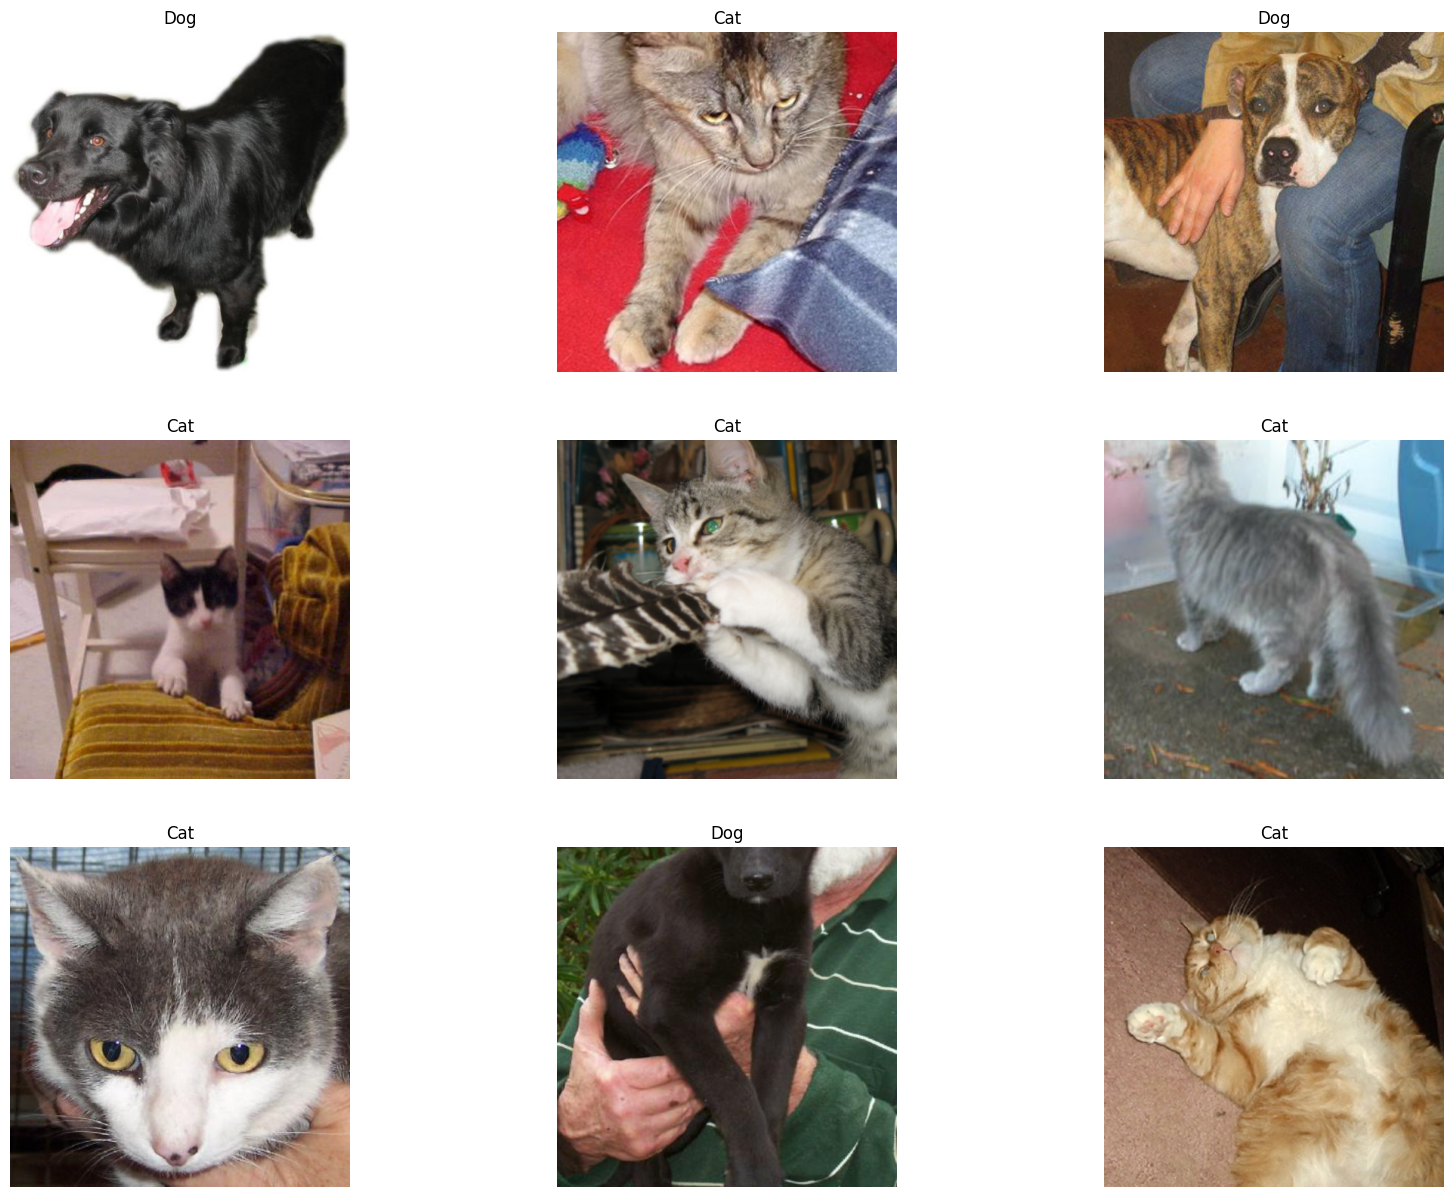

In [ ]:
data.show_batch(max_n = 9, figsize = (20, 15))

In [ ]:
learn = vision_learner(data, resnet34, metrics = [accuracy, error_rate]).to_fp16()
learn.save("default")

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:01<00:00, 62.5MB/s]


Path('PetImages/models/default.pth')

SuggestedLRs(valley=0.0010000000474974513)

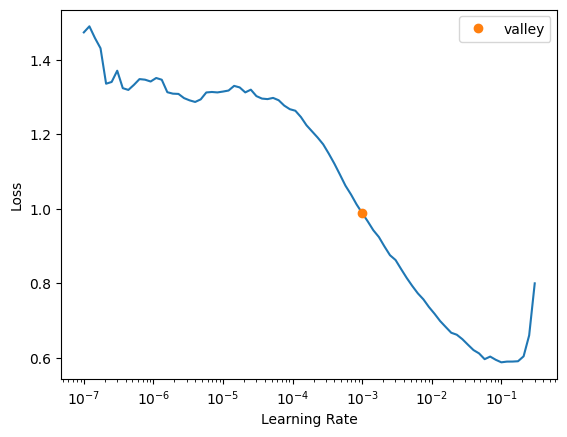

In [ ]:
learn.lr_find()

In [ ]:
learn.fit_one_cycle(4, lr_max = 1e-3)

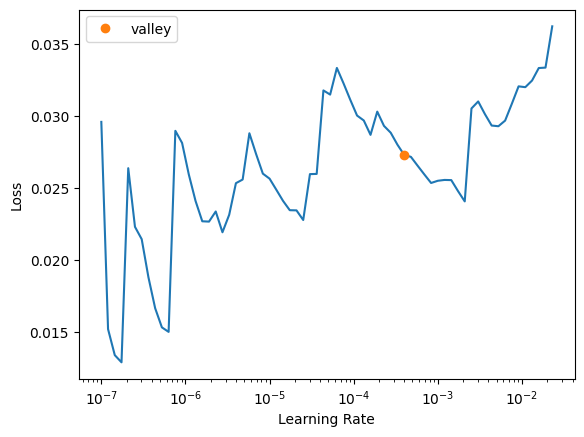

In [ ]:
lr = learn.lr_find()

In [ ]:
learn.fit_one_cycle(2, lr_max = lr)

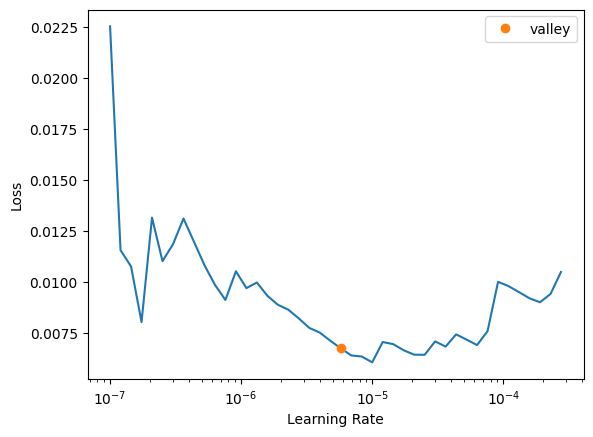

In [ ]:
learn.unfreeze()
lr = learn.lr_find()

In [ ]:
learn.fit_one_cycle(2, lr_max = lr)

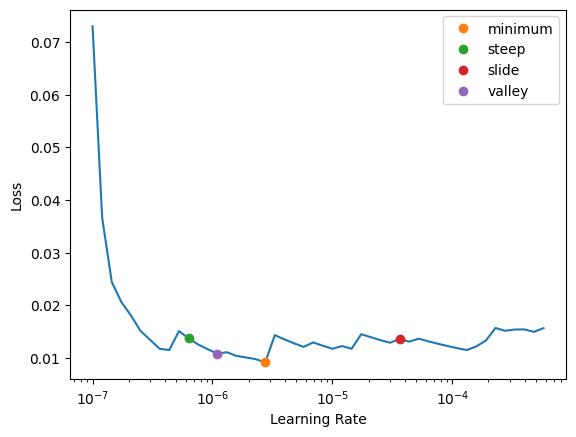

In [ ]:
learn.unfreeze()
lr = learn.lr_find(suggest_funcs = (minimum, steep, slide, valley))

In [ ]:
learn.fit_one_cycle(3, lr_max = slice(lr.steep, lr.slide))

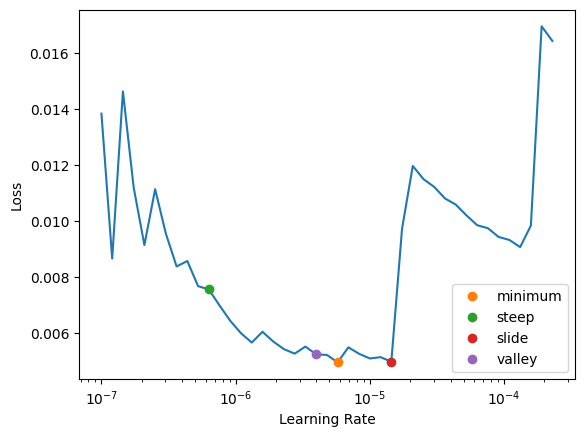

In [ ]:
learn.unfreeze()
lr = learn.lr_find(suggest_funcs = (minimum, steep, slide, valley))

In [ ]:
learn.fit_one_cycle(5, lr_max = 1e-6)

In [ ]:
learn.save("quickSave")

Path('PetImages/models/quickSave.pth')

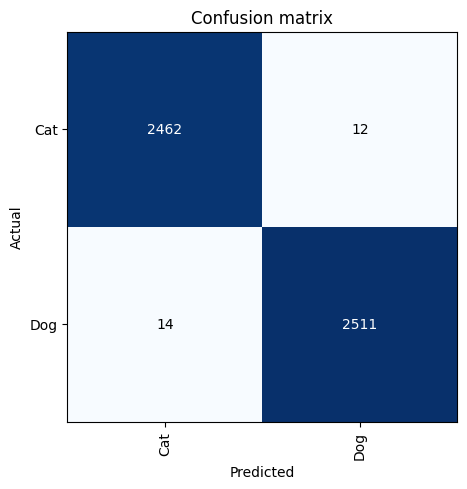

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

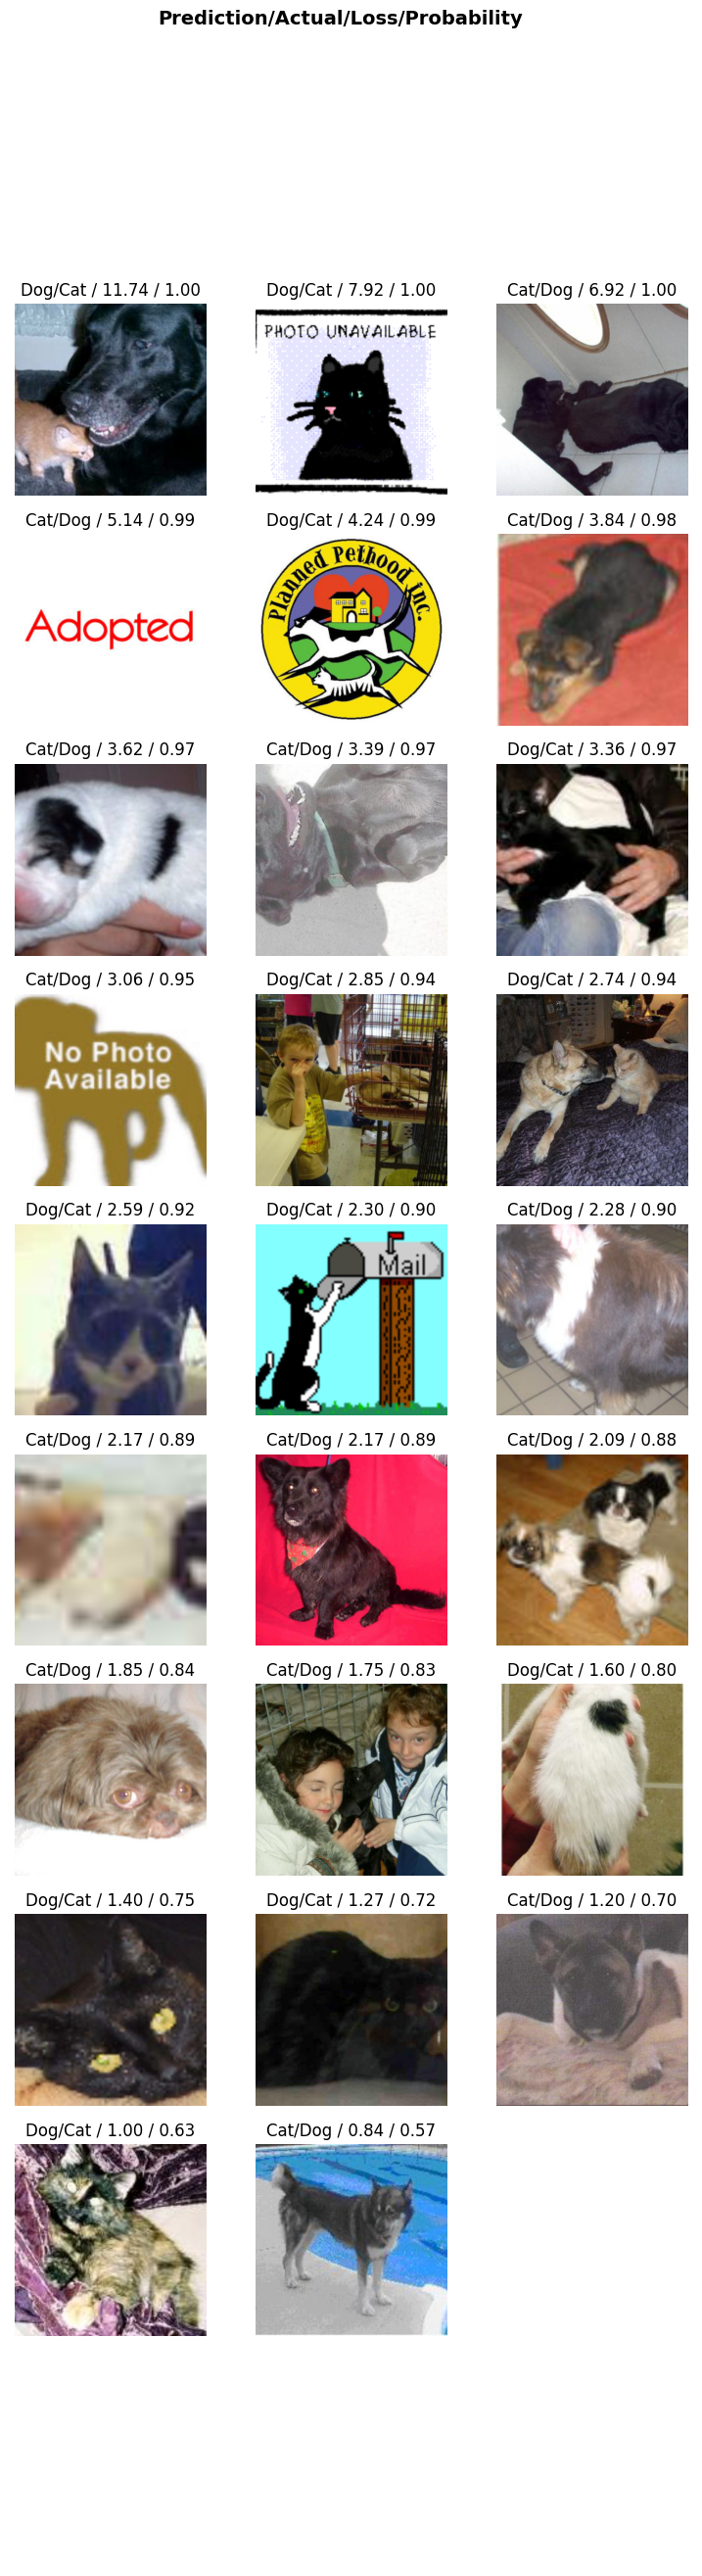

In [ ]:
interp.plot_top_losses(26, nrows = 10)